In [130]:
import pandas as pd
a=pd.read_csv("/content/Wine.csv")
print(a)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [131]:
features=a.drop(columns=["Customer_Segment"],axis=1)
target=a["Customer_Segment"]

print(target)


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64


In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(features)
print(features.shape)
print(X_reduced.shape)

(178, 13)
(178, 4)


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_before_pca = accuracy_score(y_test, y_pred)
print("Accuracy before PCA:", accuracy_before_pca*100)

Accuracy before PCA: 58.333333333333336


In [134]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_reduced, target, test_size=0.2, random_state=42)
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_model_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy after PCA:", accuracy_after_pca*100)


Accuracy after PCA: 77.77777777777779


In [135]:
import pandas as pd
a=pd.read_csv("/content/breast_cancer_survival.csv")
print(a)


     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [136]:
a=a.drop(columns=['Histology','Surgery_type','Date_of_Surgery','Date_of_Last_Visit'],axis=1)

col_replace=['ER status','PR status','HER2 status']
a[col_replace]=a[col_replace].replace({'Positive': 1,'Negative': 0})

a['Patient_Status']=a['Patient_Status'].replace({'Alive':1,'Dead':0})
round_Values=round(a.Patient_Status.mean())
a.Patient_Status=a.Patient_Status.fillna(round_Values)

a['Tumour_Stage']=a['Tumour_Stage'].replace({'I':1,'II':2,'III':3,'IV':4})
a['Gender']=a['Gender'].replace({'FEMALE':0,'MALE':1})
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     ER status  PR status  HER2 status  Patient_Status  
0            1          1            0             1.0

In [137]:
x=a.drop(columns=['Patient_Status','Gender'],axis=1)
y=a['Patient_Status']
print(x)
print(y)

     Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  ER status  \
0     42  0.952560   2.15000  0.007972 -0.048340             2          1   
1     54  0.000000   1.38020 -0.498030 -0.507320             2          1   
2     63 -0.523030   1.76400 -0.370190  0.010815             2          1   
3     78 -0.876180   0.12943 -0.370380  0.132190             1          1   
4     42  0.226110   1.74910 -0.543970 -0.390210             2          1   
..   ...       ...       ...       ...       ...           ...        ...   
329   59  0.024598   1.40050  0.024751  0.280320             2          1   
330   41  0.100120  -0.46547  0.472370 -0.523870             1          1   
331   54  0.753820   1.64250 -0.332850  0.857860             2          1   
332   74  0.972510   1.42680 -0.366570 -0.107820             2          1   
333   66  0.286380   1.39980  0.318830  0.836050             2          1   

     PR status  HER2 status  
0            1            0  
1            1 

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)

y_pred_lg=logistic_regression.predict(x_test)
accuracy_lg=accuracy_score(y_test,y_pred_lg)
print(accuracy_lg)

0.8656716417910447


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)

y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

0.8656716417910447


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
accuracy_list = []
for i in range(50):
  X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
  lr=LogisticRegression(max_iter=1000)
  lrclf=lr.fit(X_train,y_train)
  y_pred=lrclf.predict(X_test)
  accuracy=accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)
print(accuracy_list)

[0.8529411764705882, 0.8529411764705882, 0.7941176470588235, 0.7647058823529411, 0.6764705882352942, 0.8529411764705882, 0.8529411764705882, 0.8529411764705882, 0.7647058823529411, 0.7941176470588235, 0.7352941176470589, 0.9117647058823529, 0.8529411764705882, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.6764705882352942, 0.8235294117647058, 0.8529411764705882, 0.8529411764705882, 0.8529411764705882, 0.8529411764705882, 0.7647058823529411, 0.8235294117647058, 0.8529411764705882, 0.8235294117647058, 0.9117647058823529, 0.7352941176470589, 0.7647058823529411, 0.8823529411764706, 0.6764705882352942, 0.7352941176470589, 0.7352941176470589, 0.7647058823529411, 0.8235294117647058, 0.7058823529411765, 0.7941176470588235, 0.8235294117647058, 0.8529411764705882, 0.7941176470588235, 0.8529411764705882, 0.7647058823529411, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.9411764705882353, 0.8235294117647058, 0.7352941176470589, 0.8823529411764706, 0.8235294117647058]

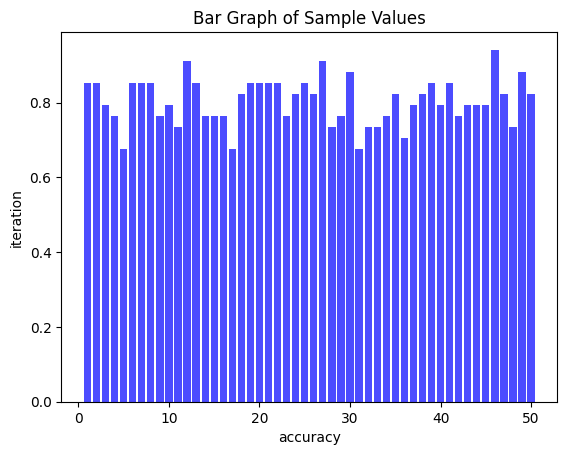

In [150]:
import matplotlib.pyplot as plt
numbers = list(range(1, 51))
plt.bar(numbers,accuracy_list, color='b', alpha=0.7)
plt.xlabel('accuracy')
plt.ylabel('iteration')
plt.title('Bar Graph of Sample Values')
plt.show()

In [152]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
accuracy_list2 = []
for i in range(51):
  X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
  svm_classifier.fit(X_train, y_train)
  y_pred = svm_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list2.append(accuracy)
print(accuracy_list2)

[0.9117647058823529, 0.6470588235294118, 0.8823529411764706, 0.7941176470588235, 0.7352941176470589, 0.8235294117647058, 0.9117647058823529, 0.7352941176470589, 0.8235294117647058, 0.7058823529411765, 0.8529411764705882, 0.7941176470588235, 0.9411764705882353, 0.8235294117647058, 0.7647058823529411, 0.9117647058823529, 0.7058823529411765, 0.7941176470588235, 0.7647058823529411, 0.8235294117647058, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.7941176470588235, 0.7941176470588235, 0.8823529411764706, 0.9117647058823529, 0.8529411764705882, 0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.7352941176470589, 0.7352941176470589, 0.7058823529411765, 0.7352941176470589, 0.7647058823529411, 0.7941176470588235, 0.8529411764705882, 0.8823529411764706, 0.8823529411764706, 0.7352941176470589, 0.8823529411764706, 0.7941176470588235, 0.7941176470588235, 0.7647058823529411, 0.7941176470588235, 0.8823529411764706, 0.7941176470588235, 0.8235294117647058, 0.7058823529411765,

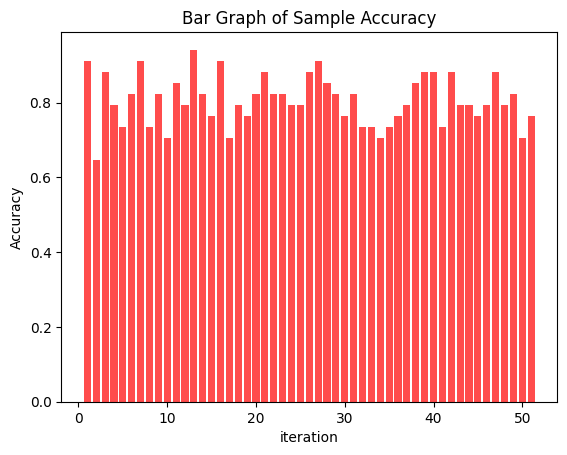

In [154]:
import matplotlib.pyplot as plt
numbers = list(range(1, 52))
plt.bar(numbers, accuracy_list2, color='r', alpha=0.7)
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Bar Graph of Sample Accuracy')
plt.show()